## EDA CAMPAÑA DE MARKETING BANCARIO

### PASO 1: DEFINIR EL PROBLEMA Y CARGA DE DATOS

Cargaremos un conjunto de datos con el fin de estudiarlo y analizarlo para ayudar a predecir si un cliente contratará servicios a largo plazo.

In [5]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS:

In [6]:
total_data.shape

(41188, 21)

In [7]:
total_data.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

### ELIMINAMOS DUPLICADOS

In [8]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### PASO 3: ANÁLISIS UNIVARIANTE

In [10]:
total_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

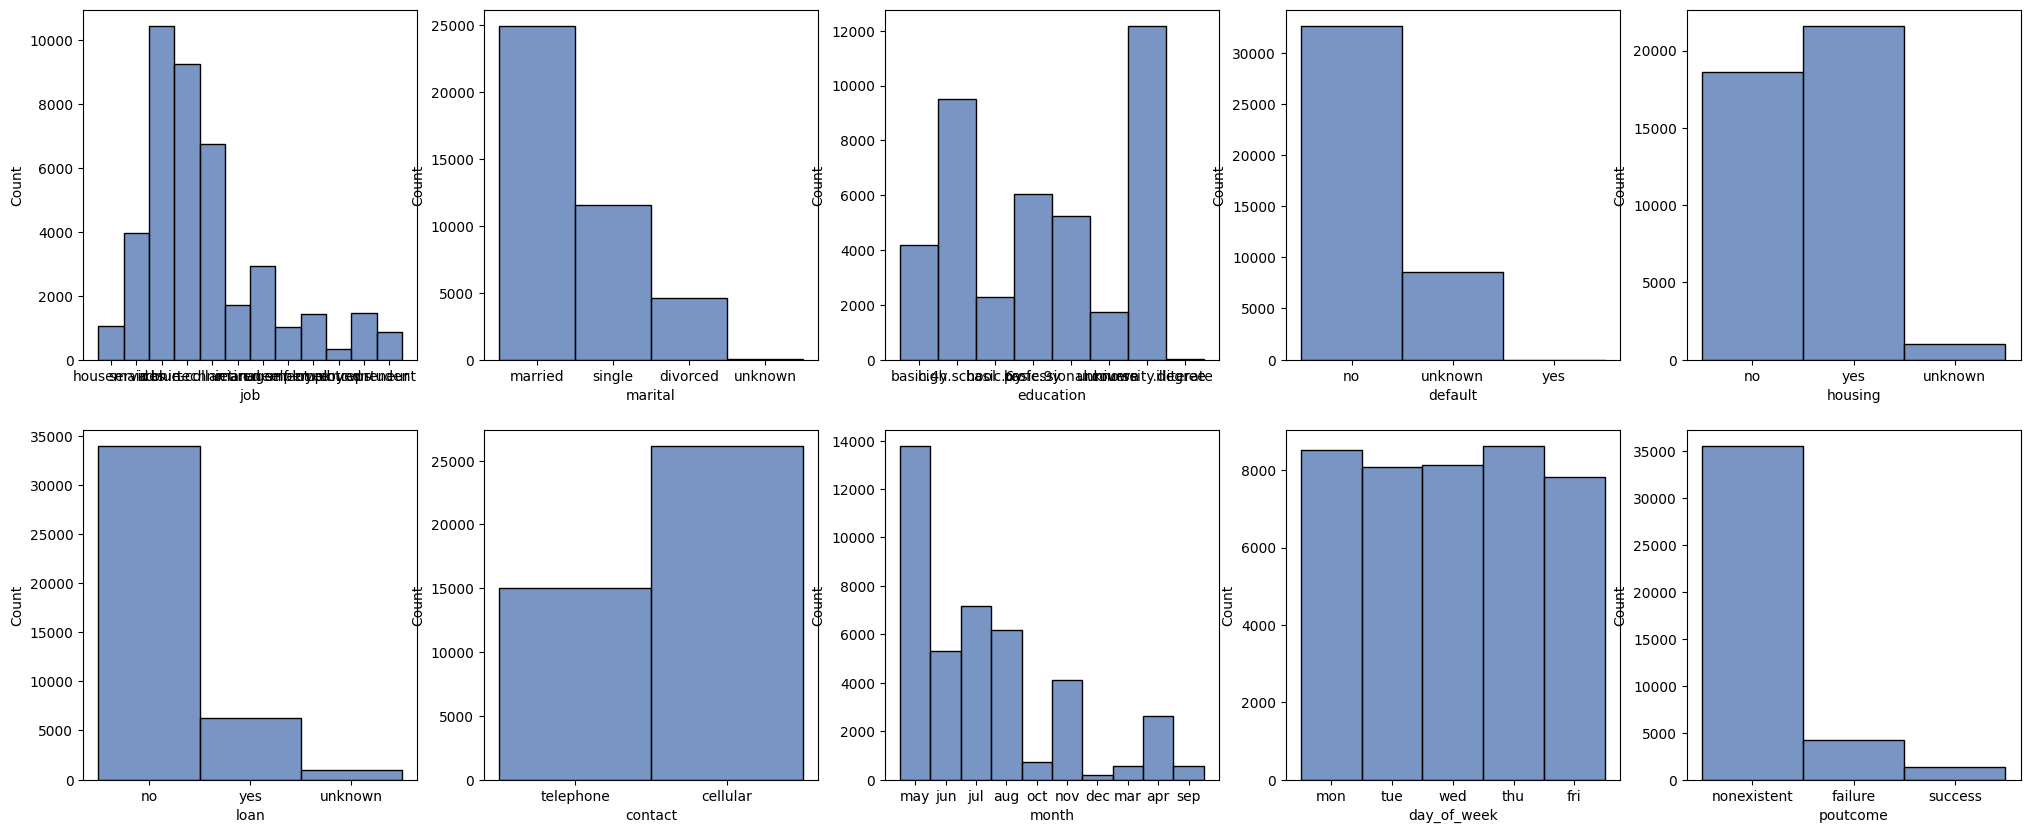

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_palette("deep")

fig, axes = plt.subplots(2, 5, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data=total_data, x='job')
sns.histplot(ax=axes[0,1], data=total_data, x='marital')
sns.histplot(ax=axes[0,2], data=total_data, x='education')
sns.histplot(ax=axes[0,3], data=total_data, x='default')
sns.histplot(ax=axes[0,4], data=total_data, x='housing')
sns.histplot(ax=axes[1,0], data=total_data, x='loan')
sns.histplot(ax=axes[1,1], data=total_data, x='contact')
sns.histplot(ax=axes[1,2], data=total_data, x='month')
sns.histplot(ax=axes[1,3], data=total_data, x='day_of_week')
sns.histplot(ax=axes[1,4], data=total_data, x='poutcome')

plt.show()



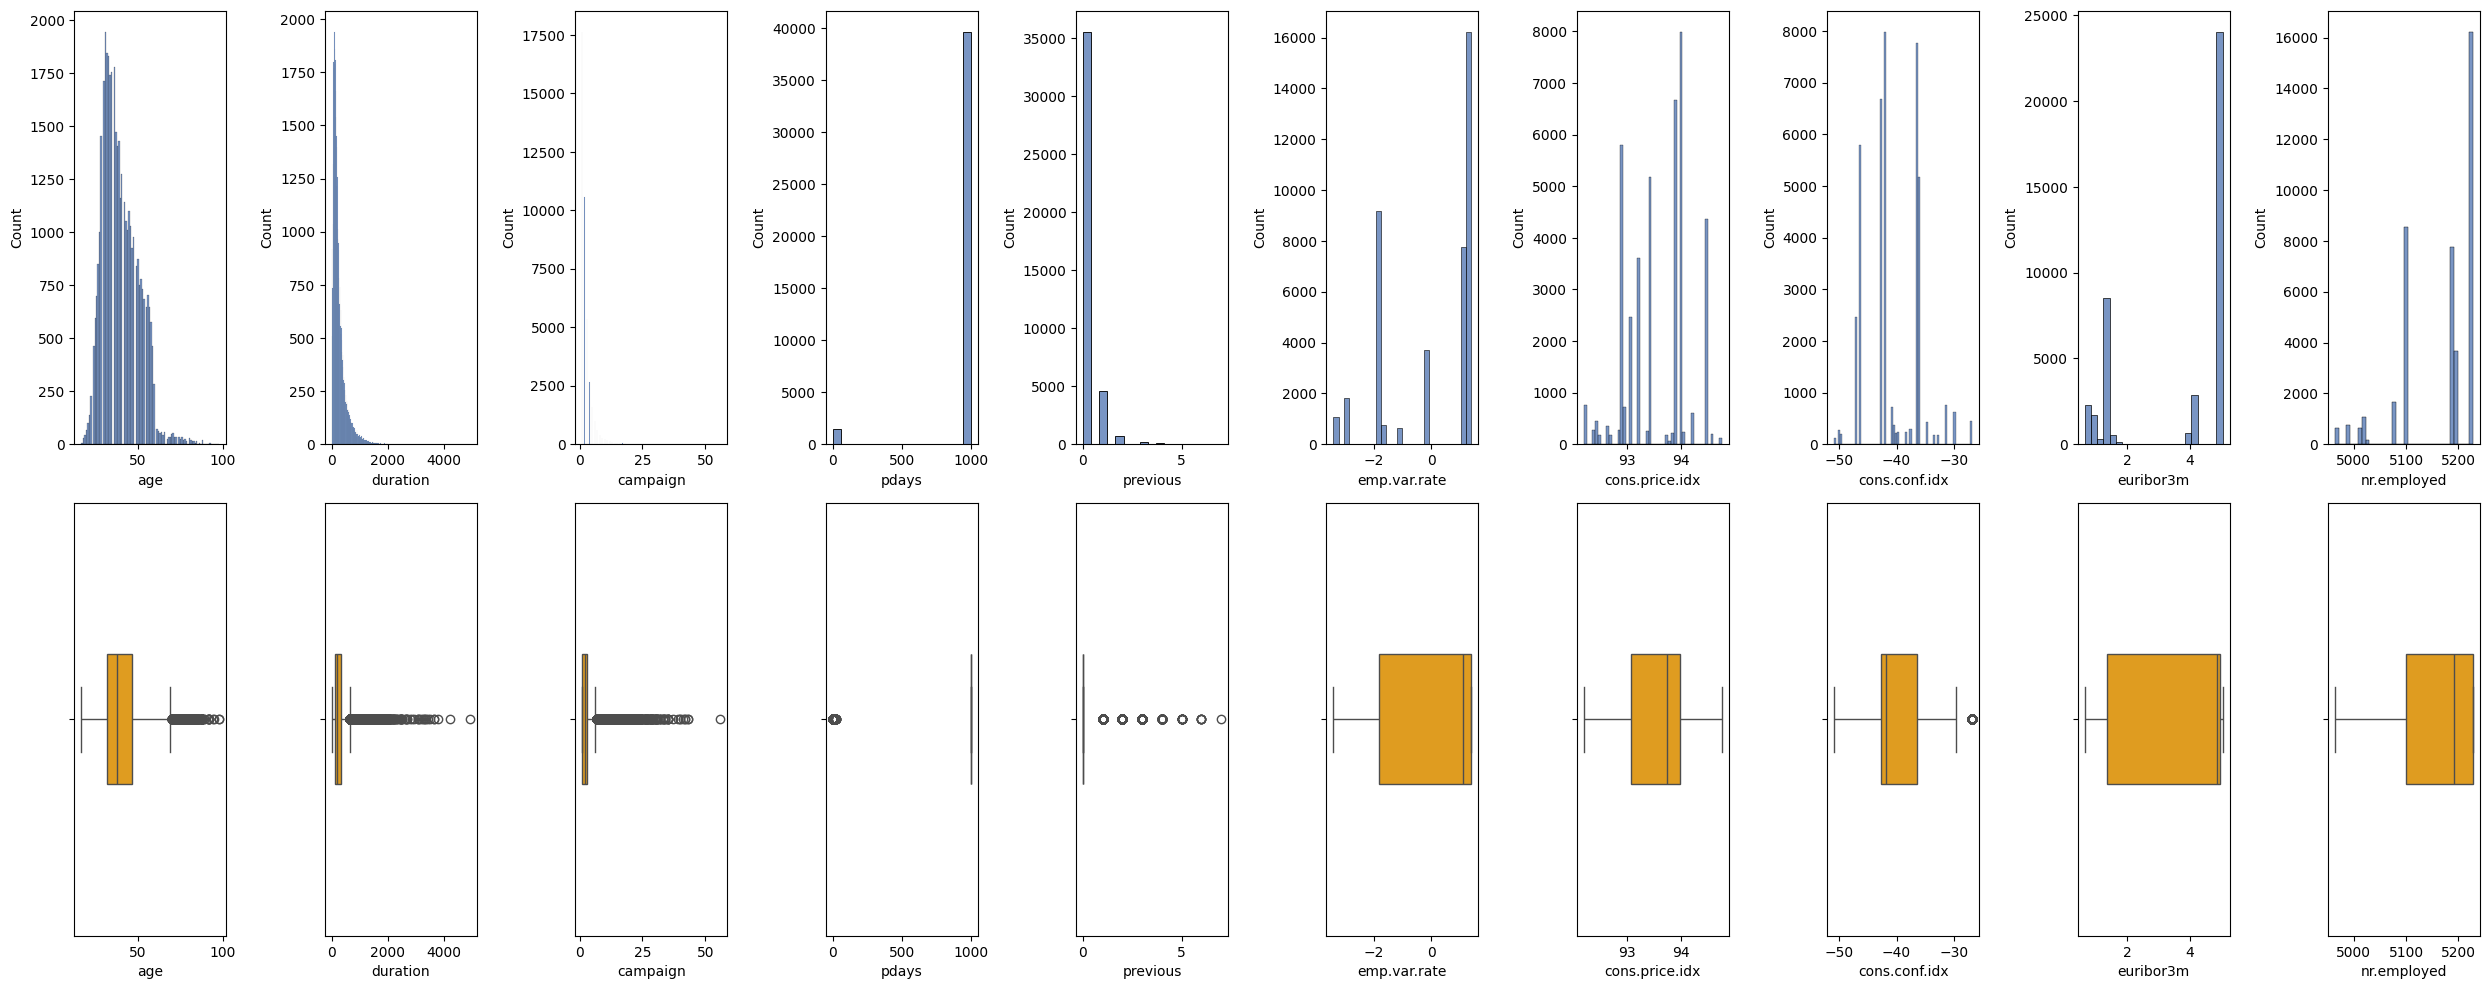

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(25, 10))

sns.histplot(ax=axes[0, 0], data=total_data, x='age')
sns.boxplot(ax=axes[1, 0], data=total_data, x='age', width=0.3, color='orange')

sns.histplot(ax=axes[0, 1], data=total_data, x='duration')
sns.boxplot(ax=axes[1, 1], data=total_data, x='duration', width=0.3, color='orange')

sns.histplot(ax=axes[0, 2], data=total_data, x='campaign')
sns.boxplot(ax=axes[1, 2], data=total_data, x='campaign', width=0.3, color='orange')

sns.histplot(ax=axes[0, 3], data=total_data, x='pdays')
sns.boxplot(ax=axes[1, 3], data=total_data, x='pdays', width=0.3, color='orange')

sns.histplot(ax=axes[0, 4], data=total_data, x='previous')
sns.boxplot(ax=axes[1, 4], data=total_data, x='previous', width=0.3, color='orange')

sns.histplot(ax=axes[0, 5], data=total_data, x='emp.var.rate')
sns.boxplot(ax=axes[1, 5], data=total_data, x='emp.var.rate', width=0.3, color='orange')

sns.histplot(ax=axes[0, 6], data=total_data, x='cons.price.idx')
sns.boxplot(ax=axes[1, 6], data=total_data, x='cons.price.idx', width=0.3, color='orange')

sns.histplot(ax=axes[0, 7], data=total_data, x='cons.conf.idx')
sns.boxplot(ax=axes[1, 7], data=total_data, x='cons.conf.idx', width=0.3, color='orange')

sns.histplot(ax=axes[0, 8], data=total_data, x='euribor3m')
sns.boxplot(ax=axes[1, 8], data=total_data, x='euribor3m', width=0.3, color='orange')

sns.histplot(ax=axes[0, 9], data=total_data, x='nr.employed')
sns.boxplot(ax=axes[1, 9], data=total_data, x='nr.employed', width=0.3, color='orange')

plt.tight_layout()
plt.show()




### PASO 4: ANÁLISIS MULTIVARIANTE:

Análisis categórico - categórico

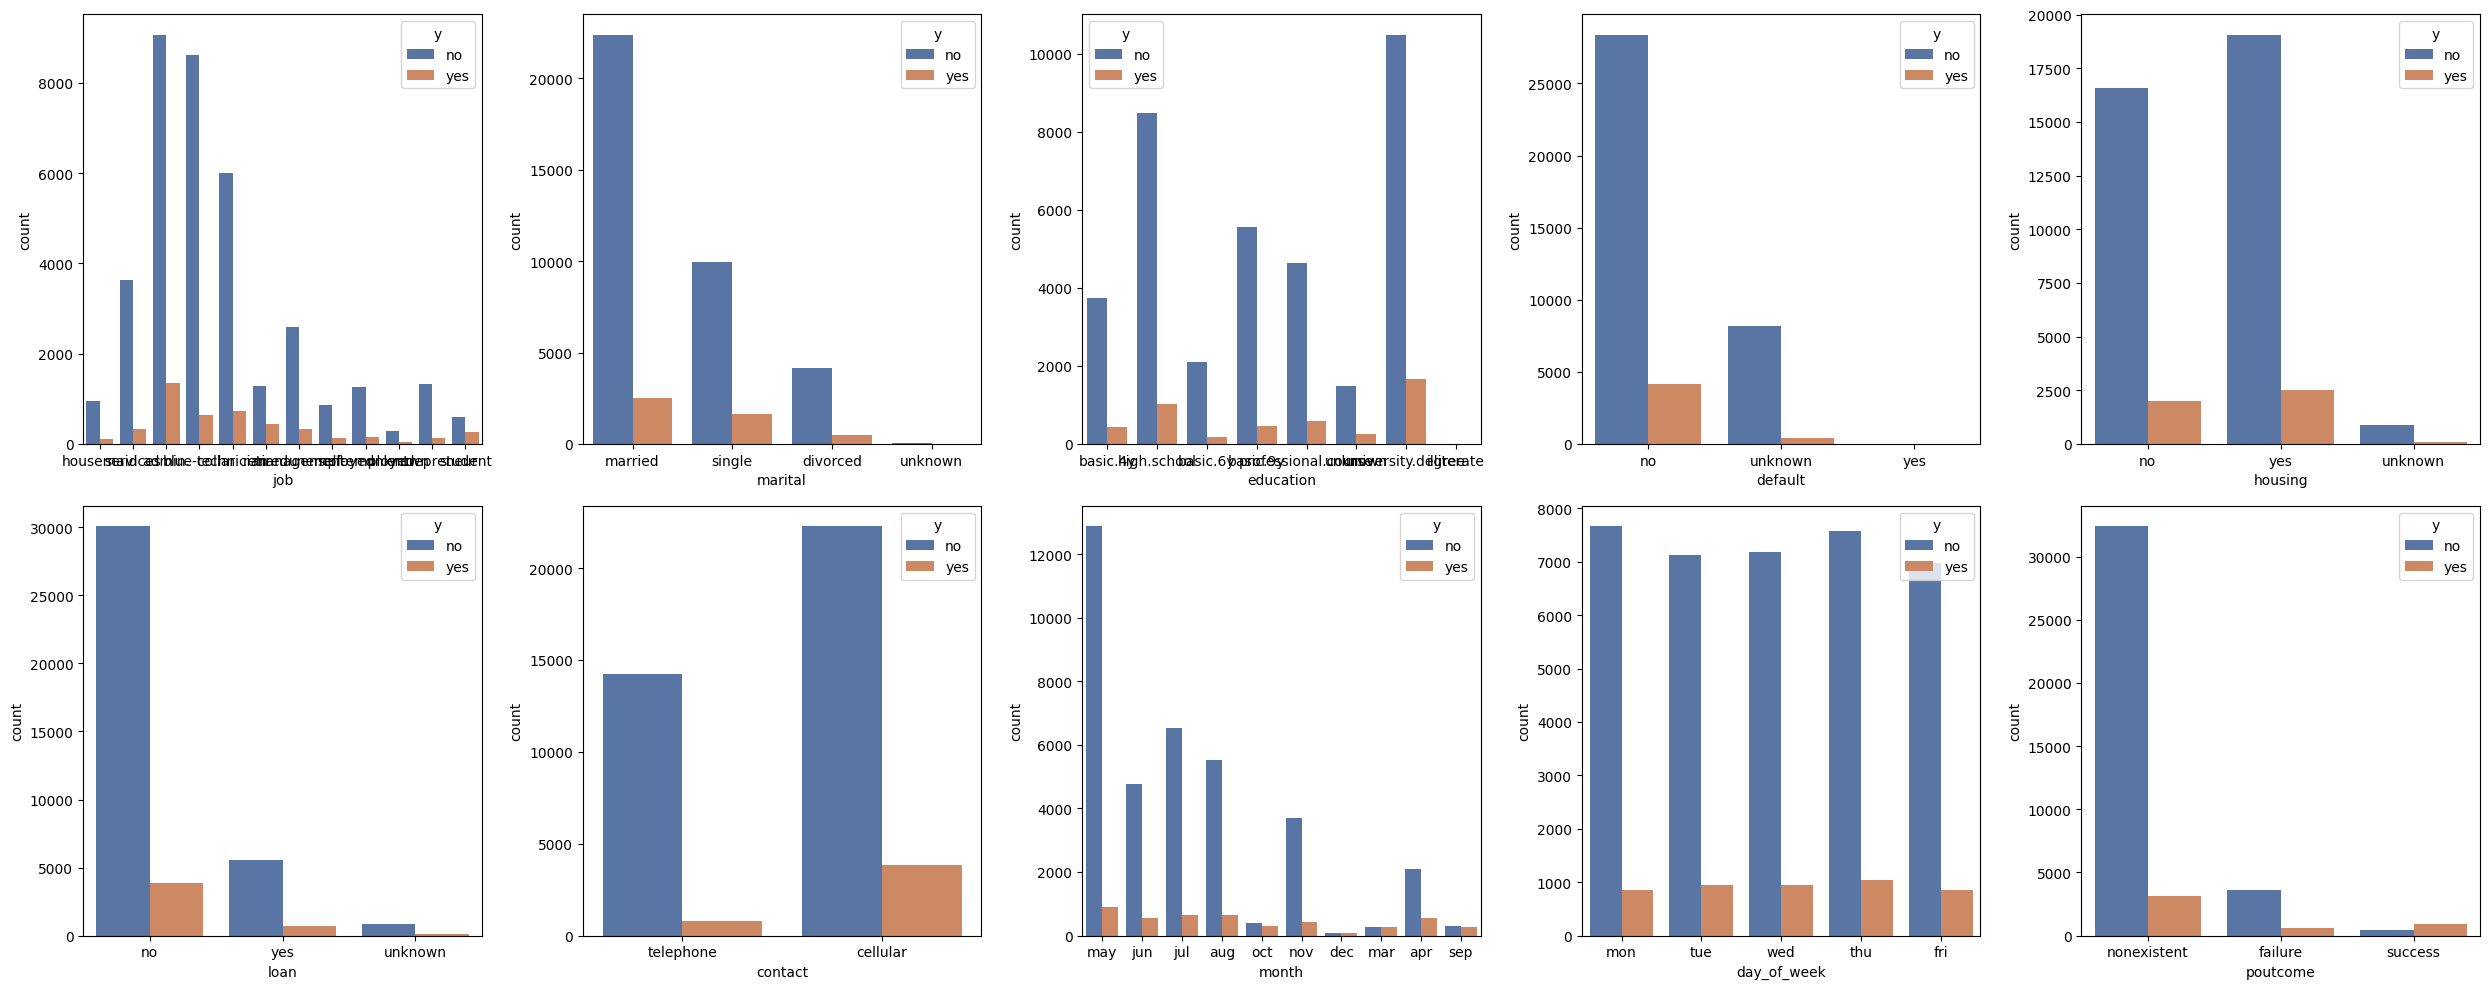

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 5, figsize=(25, 10))

sns.countplot(data=total_data, x="job", hue="y", ax=axes[0,0])
sns.countplot(data=total_data, x="marital", hue="y", ax=axes[0,1])
sns.countplot(data=total_data, x="education", hue="y", ax=axes[0,2])
sns.countplot(data=total_data, x="default", hue="y", ax=axes[0,3])
sns.countplot(data=total_data, x="housing", hue="y", ax=axes[0,4])

sns.countplot(data=total_data, x="loan", hue="y", ax=axes[1,0])
sns.countplot(data=total_data, x="contact", hue="y", ax=axes[1,1])
sns.countplot(data=total_data, x="month", hue="y", ax=axes[1,2])
sns.countplot(data=total_data, x="day_of_week", hue="y", ax=axes[1,3])
sns.countplot(data=total_data, x="poutcome", hue="y", ax=axes[1,4])

plt.tight_layout()
plt.show()



Analisis numerico - numerico 

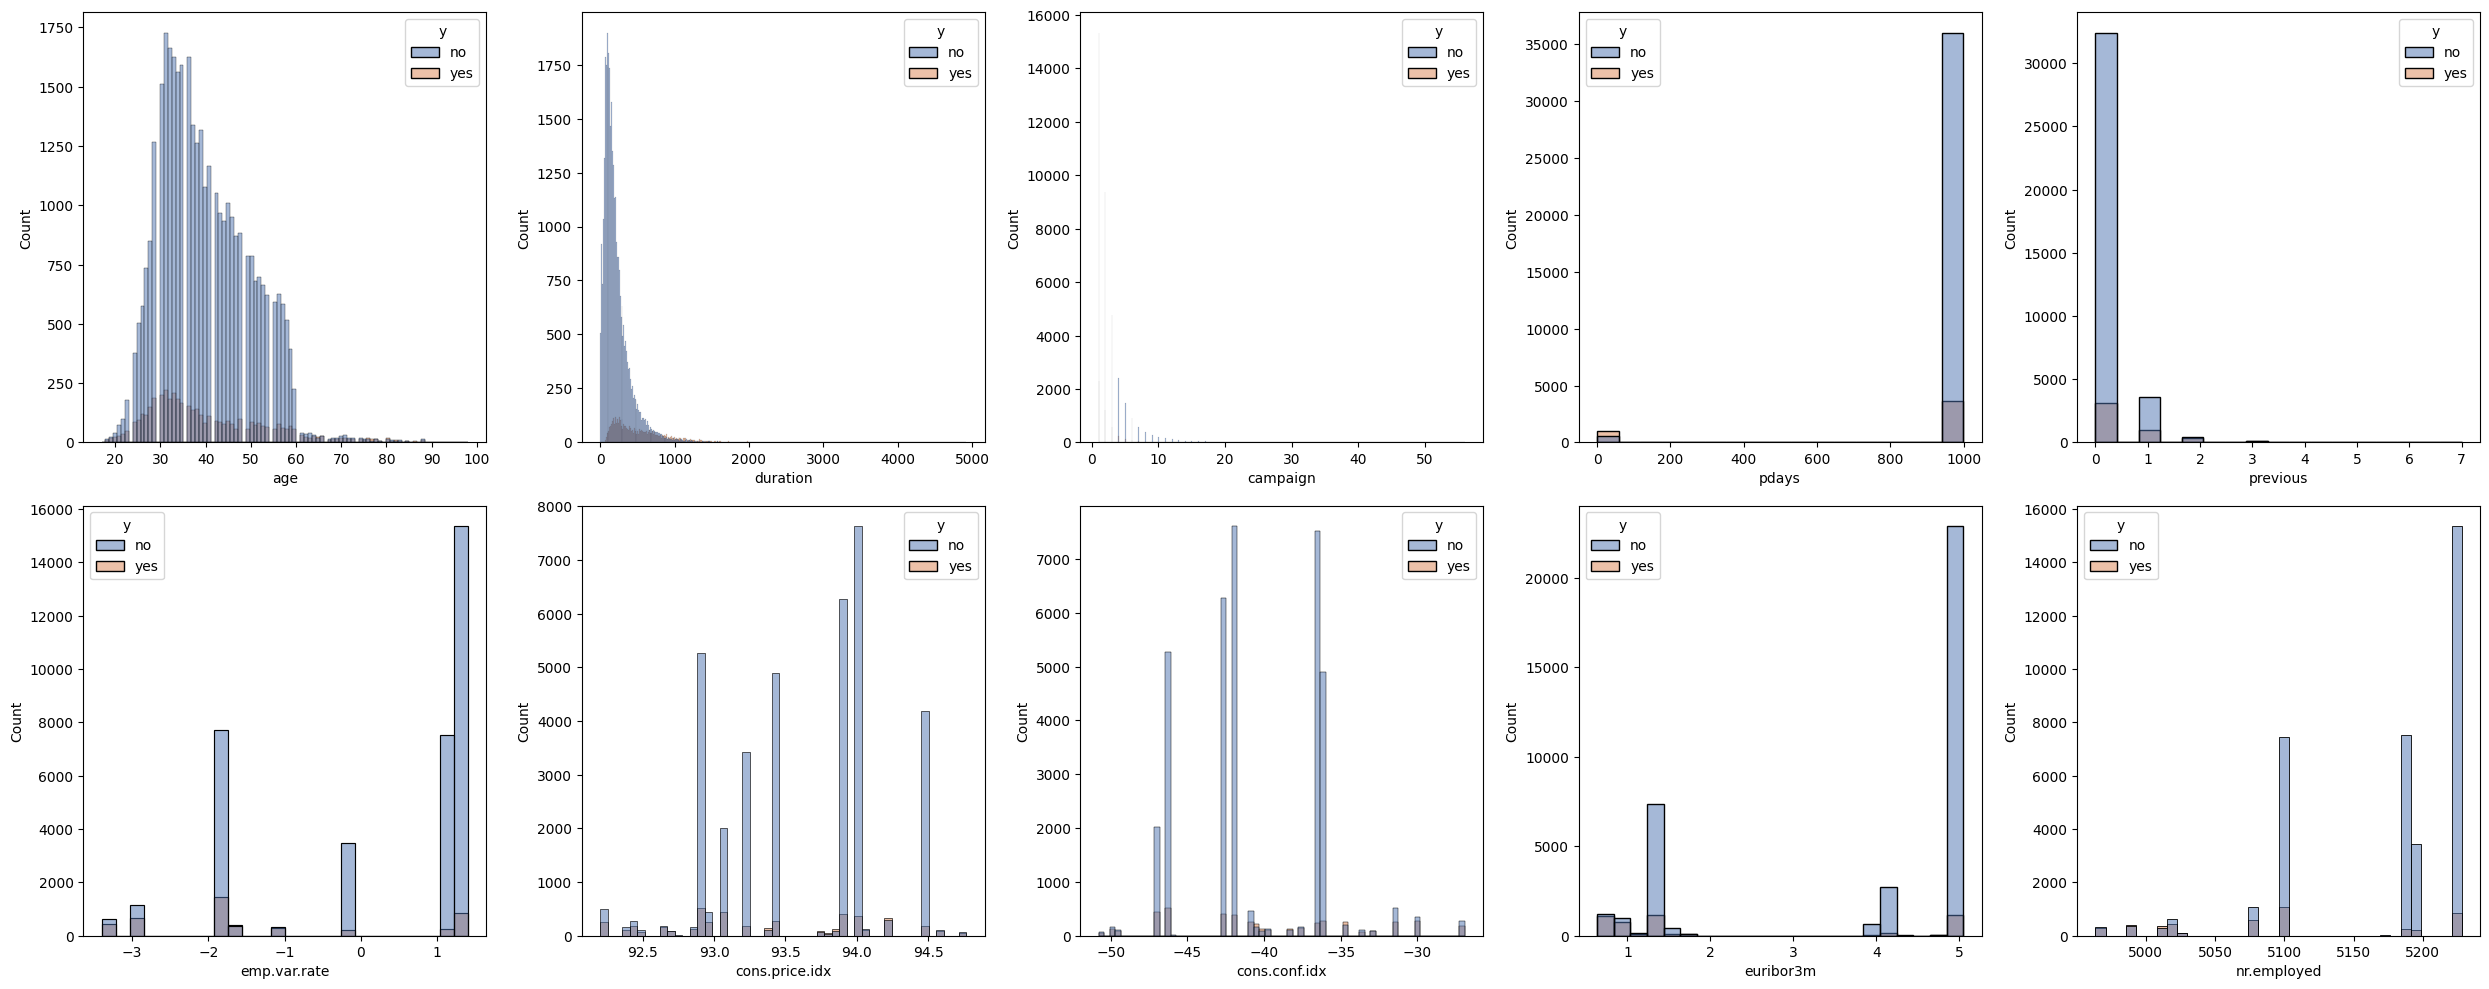

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_vars = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                'euribor3m', 'nr.employed']


fig, axes = plt.subplots(2, 5, figsize=(25, 10))


for i, var in enumerate(numeric_vars):
    sns.histplot(data=total_data, x=var, hue="y", ax=axes[i//5, i%5])

plt.tight_layout()
plt.show()


Análisis numerico - categorico

In [23]:
for col in total_data.columns:
    if total_data[col].dtype == 'object': 
        total_data[col], _ = pd.factorize(total_data[col])  

print(total_data.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    0        0          0        0        0     0        0      0   
1   57    1        0          1        1        0     0        0      0   
2   37    1        0          1        0        1     0        0      0   
3   40    2        0          2        0        0     0        0      0   
4   56    1        0          1        0        0     1        0      0   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1    999         0         0           1.1   
1            0  ...         1    999         0         0           1.1   
2            0  ...         1    999         0         0           1.1   
3            0  ...         1    999         0         0           1.1   
4            0  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

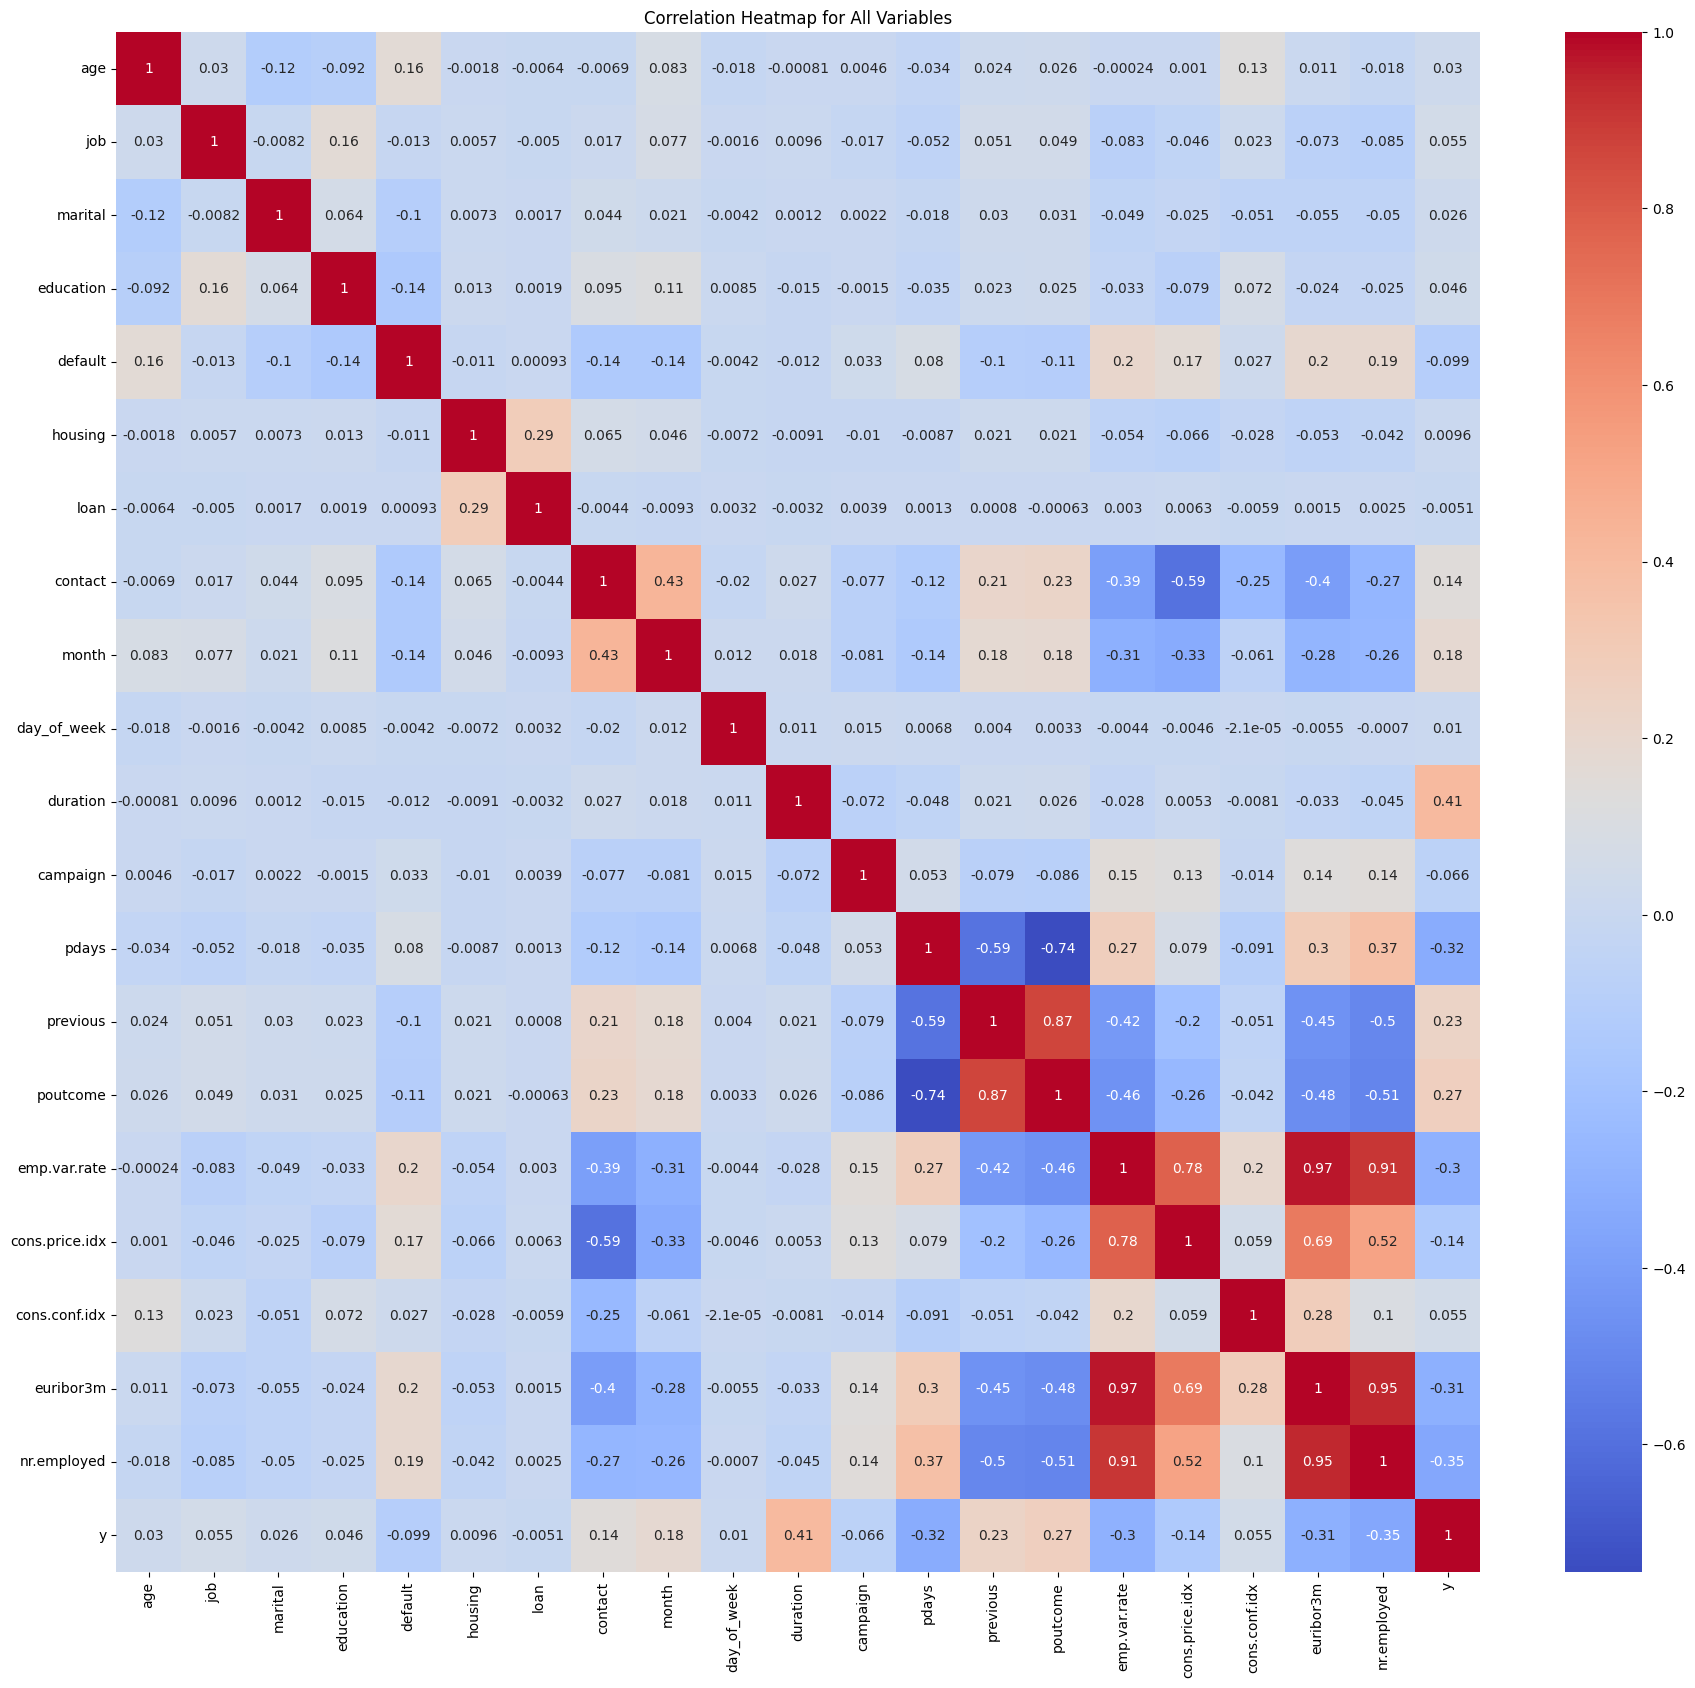

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(22, 20))  
sns.heatmap(total_data.corr(), annot=True, cmap='coolwarm')  
plt.title('Correlation Heatmap for All Variables')
plt.show()  


In [30]:
from sklearn.preprocessing import MinMaxScaler
num_variables = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


### Feature Selection

In [32]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("y", axis = 1)
y = total_data_scal["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980730,1.000000
1,0.0,0.0,0.333333,0.138291,0.512287
2,0.0,0.0,0.937500,0.956926,0.859735
3,0.0,0.0,0.937500,0.957379,0.859735
4,0.0,0.0,0.333333,0.175924,0.512287


In [33]:
X_test_sel.head()

,poutcome,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.000000,0.104167,0.143278,0.425709
1,0.5,0.142857,0.333333,0.150759,0.512287
2,0.0,0.000000,0.479167,0.073679,0.000000
3,0.5,0.142857,0.333333,0.150759,0.512287
4,0.0,0.000000,1.000000,0.981410,1.000000


In [34]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

### Logistic Regression

In [35]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,1.000000,0.980730,1.000000,0.0
1,0.0,0.0,0.333333,0.138291,0.512287,0.0
2,0.0,0.0,0.937500,0.956926,0.859735,0.0
3,0.0,0.0,0.937500,0.957379,0.859735,0.0
4,0.0,0.0,0.333333,0.175924,0.512287,0.0


In [36]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8919378338999514

In [41]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [42]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [43]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [44]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
accuracy_score(y_test, y_pred)

0.8938805245264692